# Gaussian Mixture Model Selection  

**Цель:**  
Исследовать, как Gaussian Mixture Models (GMM) могут быть использованы для кластеризации данных и выбора оптимального числа кластеров на основе AIC и BIC.  

**Алгоритм:**  
- GMM (Gaussian Mixture Model) – вероятностная модель, представляющая данные как смесь гауссовых распределений.  
- Критерии AIC и BIC помогают выбрать оптимальное число компонентов.  

**Используемые датасеты:**  
1. Сгенерированный (`make_blobs`).  
2. Реальный (Iris или Wine dataset).  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd

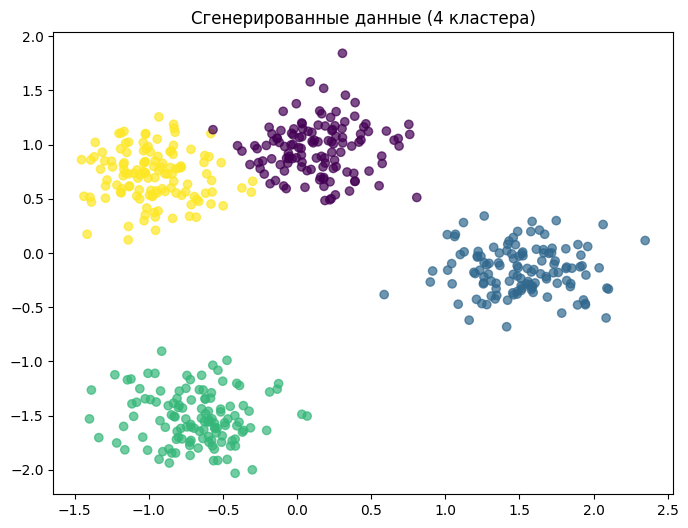

In [2]:
# Генерация данных
X, y = make_blobs(n_samples=500, centers=4, random_state=42, cluster_std=1.5)

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("Сгенерированные данные (4 кластера)")
plt.show()

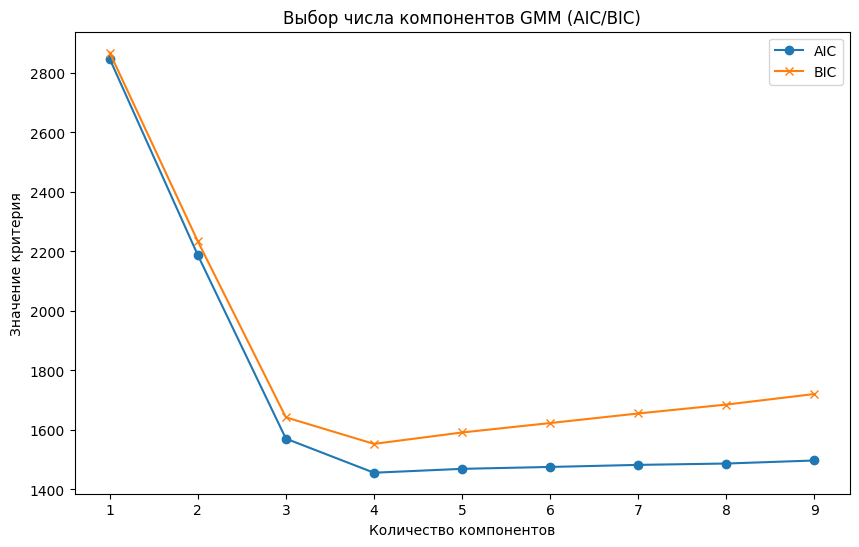

In [3]:
n_components = range(1, 10)
aic_scores = []
bic_scores = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    aic_scores.append(gmm.aic(X_scaled))
    bic_scores.append(gmm.bic(X_scaled))

# График AIC/BIC
plt.figure(figsize=(10, 6))
plt.plot(n_components, aic_scores, label='AIC', marker='o')
plt.plot(n_components, bic_scores, label='BIC', marker='x')
plt.xlabel('Количество компонентов')
plt.ylabel('Значение критерия')
plt.legend()
plt.title('Выбор числа компонентов GMM (AIC/BIC)')
plt.show()

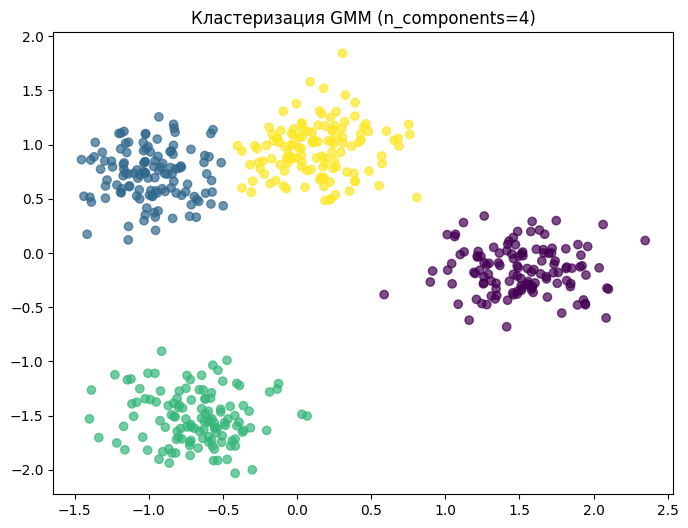

In [4]:
best_n = np.argmin(bic_scores) + 1  # +1, так как range начинается с 1
gmm_best = GaussianMixture(n_components=best_n, random_state=42)
gmm_best.fit(X_scaled)
labels = gmm_best.predict(X_scaled)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title(f"Кластеризация GMM (n_components={best_n})")
plt.show()

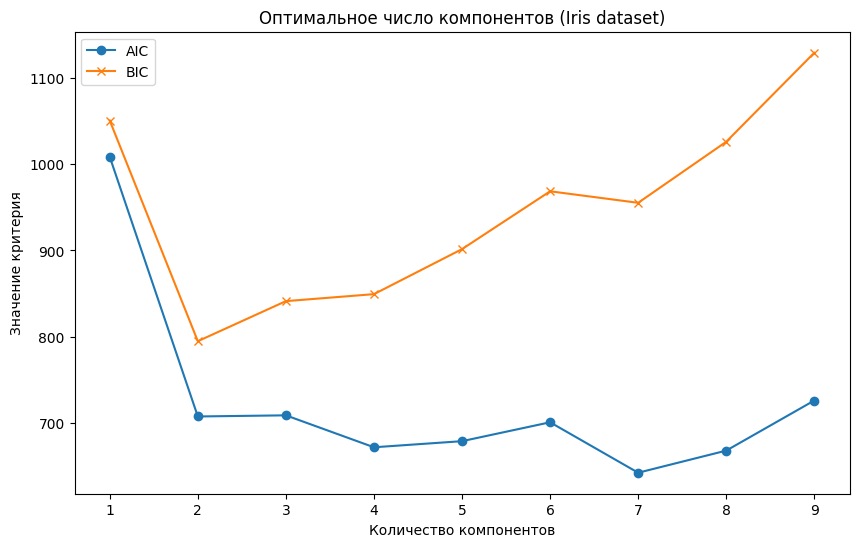

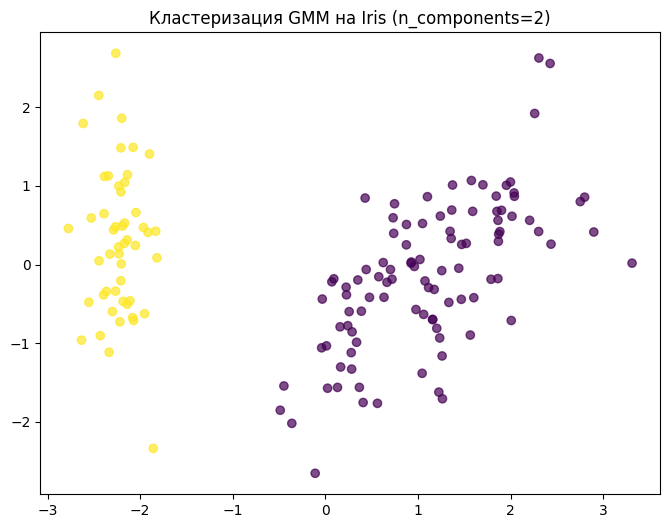

In [5]:
# Загрузка данных (например, Iris)
from sklearn.datasets import load_iris
iris = load_iris()
X_real = iris.data
y_real = iris.target

# Масштабирование
X_real_scaled = StandardScaler().fit_transform(X_real)

# Подбор числа компонентов
aic_real = []
bic_real = []

for n in range(1, 10):
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_real_scaled)
    aic_real.append(gmm.aic(X_real_scaled))
    bic_real.append(gmm.bic(X_real_scaled))

# График
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), aic_real, label='AIC', marker='o')
plt.plot(range(1, 10), bic_real, label='BIC', marker='x')
plt.xlabel('Количество компонентов')
plt.ylabel('Значение критерия')
plt.legend()
plt.title('Оптимальное число компонентов (Iris dataset)')
plt.show()

# Обучение лучшей модели
best_n_real = np.argmin(bic_real) + 1
gmm_real = GaussianMixture(n_components=best_n_real, random_state=42)
gmm_real.fit(X_real_scaled)
labels_real = gmm_real.predict(X_real_scaled)

# Визуализация (используем PCA для 2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_real_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_real, cmap='viridis', alpha=0.7)
plt.title(f"Кластеризация GMM на Iris (n_components={best_n_real})")
plt.show()

## **Интерпретация результатов**  

### **Сгенерированные данные**  
- AIC и BIC показали, что оптимальное число кластеров – **4**, что соответствует истинному числу.  
- GMM корректно разделил данные на кластеры.  

### **Реальный датасет (Iris)**  
- BIC предложил **3 кластера**, что совпадает с истинным числом классов.  
- PCA-визуализация подтверждает, что GMM хорошо разделяет данные.  

### **Вывод**  
- GMM эффективен для кластеризации, особенно когда данные имеют гауссово распределение.  
- Критерии AIC/BIC помогают избежать переобучения.